In [55]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt

In [56]:
from education_DataSet_cleaning_extraction import load_table_to_dataframe

In [57]:

file_path = "2019-29/education.xlsx"
file_path2 = "2023-33/education.xlsx"
file_path3 = "2019-29/occupation.xlsx"
education_52_1929 = load_table_to_dataframe(file_path, "Table 5.2", header_row=1,num_rows=9)
education_53_1929 = load_table_to_dataframe(file_path, "Table 5.3", header_row=1,num_rows=791)
education_54_1929 = load_table_to_dataframe(file_path,"Table 5.4",header_row=1,num_rows=790)
education_51_2333 = load_table_to_dataframe(file_path2, "Table 5.1", header_row=1,num_rows=8)
education_52_2333 = load_table_to_dataframe(file_path2, "Table 5.2", header_row=1,num_rows=9)
education_53_2333 = load_table_to_dataframe(file_path2, "Table 5.3", header_row=1,num_rows=833)
education_54_2333 = load_table_to_dataframe(file_path2,"Table 5.4",header_row=1,num_rows=832)
occupation_11_1929 = load_table_to_dataframe(file_path3, "Table 1.1", header_row=1,num_rows=23)

In [58]:
occupation_11_1929['lables'] = occupation_11_1929['2019 National Employment Matrix code'].str.split('-').str[0]

In [59]:
# Create a dictionary from the two columns
title_labels_dict = occupation_11_1929.set_index('lables')['2019 National Employment Matrix title'].to_dict()
# Check the dictionary
education_53_1929['lables'] = education_53_1929['2019 National Employment Matrix code'].str.split('-').str[0]
education_53_1929['Title Labels'] = education_53_1929['lables'].map(title_labels_dict)

education_53_2333['lables'] = education_54_2333['2023 National Employment Matrix code'].str.split('-').str[0]
education_53_2333['Title Labels'] = education_53_2333['lables'].map(title_labels_dict)

education_54_1929['lables'] = education_54_1929['2019 National Employment Matrix code'].str.split('-').str[0]
education_54_1929['Title Labels'] = education_54_1929['lables'].map(title_labels_dict)

education_54_2333['lables'] = education_54_2333['2023 National Employment Matrix code'].str.split('-').str[0]
education_54_2333['Title Labels'] = education_54_2333['lables'].map(title_labels_dict)

In [60]:
education_53_1929

,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,lables,Title Labels
0,"Total, all occupations",00-0000,7.9,23.6,20.0,9.5,23.9,10.6,4.4,00,"Total, all occupations"
1,Chief executives(1),11-1011,1.6,8.0,13.9,4.8,41.0,24.1,6.5,11,Management occupations
2,General and operations managers,11-1021,2.6,16.9,24.3,10.0,33.4,11.1,1.7,11,Management occupations
3,Legislators(1),11-1031,1.6,8.0,13.9,4.8,41.0,24.1,6.5,11,Management occupations
4,Advertising and promotions managers,11-2011,1.1,1.8,10.6,6.2,65.6,12.7,2.0,11,Management occupations
...,...,...,...,...,...,...,...,...,...,...,...
786,"Pump operators, except wellhead pumpers(1)",53-7072,15.8,40.1,20.2,8.5,12.9,2.5,0.1,53,Transportation and material moving occupations
787,Wellhead pumpers(1),53-7073,15.8,40.1,20.2,8.5,12.9,2.5,0.1,53,Transportation and material moving occupations
788,Refuse and recyclable material collectors,53-7081,26.4,44.7,15.0,6.1,7.3,0.3,0.1,53,Transportation and material moving occupations
789,"Tank car, truck, and ship loaders(1)",53-7121,17.4,49.6,19.6,6.2,5.8,1.4,0.1,53,Transportation and material moving occupations


In [61]:
education_53_1929['2019 National Employment Matrix title'] = education_53_1929[
    '2019 National Employment Matrix title'
].str.replace(r'\(.*?\)', '', regex=True).str.strip()

education_53_1929

,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,lables,Title Labels
0,"Total, all occupations",00-0000,7.9,23.6,20.0,9.5,23.9,10.6,4.4,00,"Total, all occupations"
1,Chief executives,11-1011,1.6,8.0,13.9,4.8,41.0,24.1,6.5,11,Management occupations
2,General and operations managers,11-1021,2.6,16.9,24.3,10.0,33.4,11.1,1.7,11,Management occupations
3,Legislators,11-1031,1.6,8.0,13.9,4.8,41.0,24.1,6.5,11,Management occupations
4,Advertising and promotions managers,11-2011,1.1,1.8,10.6,6.2,65.6,12.7,2.0,11,Management occupations
...,...,...,...,...,...,...,...,...,...,...,...
786,"Pump operators, except wellhead pumpers",53-7072,15.8,40.1,20.2,8.5,12.9,2.5,0.1,53,Transportation and material moving occupations
787,Wellhead pumpers,53-7073,15.8,40.1,20.2,8.5,12.9,2.5,0.1,53,Transportation and material moving occupations
788,Refuse and recyclable material collectors,53-7081,26.4,44.7,15.0,6.1,7.3,0.3,0.1,53,Transportation and material moving occupations
789,"Tank car, truck, and ship loaders",53-7121,17.4,49.6,19.6,6.2,5.8,1.4,0.1,53,Transportation and material moving occupations


In [62]:
education_53_2333

,2023 National Employment Matrix title,2023 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,lables,Title Labels
0,"Total, all occupations",00-0000,7.4,22.6,18.9,9.5,25.1,11.7,4.8,11,Management occupations
1,Chief executives[1],11-1011,1.6,7.9,13.7,5.2,40.0,24.7,6.9,11,Management occupations
2,General and operations managers,11-1021,3.2,17.5,23.5,9.9,32.7,11.5,1.6,11,Management occupations
3,Legislators[1],11-1031,1.6,7.9,13.7,5.2,40.0,24.7,6.9,11,Management occupations
4,Advertising and promotions managers,11-2011,1.0,4.2,7.8,5.2,65.2,15.2,1.4,11,Management occupations
...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers[1]",53-7072,14.0,45.1,25.5,6.8,7.8,0.7,0.2,53,Transportation and material moving occupations
829,Wellhead pumpers[1],53-7073,14.0,45.1,25.5,6.8,7.8,0.7,0.2,53,Transportation and material moving occupations
830,Refuse and recyclable material collectors,53-7081,25.2,48.8,16.1,3.7,5.2,0.7,0.4,53,Transportation and material moving occupations
831,"Tank car, truck, and ship loaders[1]",53-7121,14.4,51.5,19.8,6.4,6.6,1.0,0.4,53,Transportation and material moving occupations


In [63]:
education_53_2333['2023 National Employment Matrix title'] = education_53_2333[
    '2023 National Employment Matrix title'
].str.replace(r'\[.*?\]', '', regex=True).str.strip()

education_53_2333

,2023 National Employment Matrix title,2023 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,lables,Title Labels
0,"Total, all occupations",00-0000,7.4,22.6,18.9,9.5,25.1,11.7,4.8,11,Management occupations
1,Chief executives,11-1011,1.6,7.9,13.7,5.2,40.0,24.7,6.9,11,Management occupations
2,General and operations managers,11-1021,3.2,17.5,23.5,9.9,32.7,11.5,1.6,11,Management occupations
3,Legislators,11-1031,1.6,7.9,13.7,5.2,40.0,24.7,6.9,11,Management occupations
4,Advertising and promotions managers,11-2011,1.0,4.2,7.8,5.2,65.2,15.2,1.4,11,Management occupations
...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,14.0,45.1,25.5,6.8,7.8,0.7,0.2,53,Transportation and material moving occupations
829,Wellhead pumpers,53-7073,14.0,45.1,25.5,6.8,7.8,0.7,0.2,53,Transportation and material moving occupations
830,Refuse and recyclable material collectors,53-7081,25.2,48.8,16.1,3.7,5.2,0.7,0.4,53,Transportation and material moving occupations
831,"Tank car, truck, and ship loaders",53-7121,14.4,51.5,19.8,6.4,6.6,1.0,0.4,53,Transportation and material moving occupations


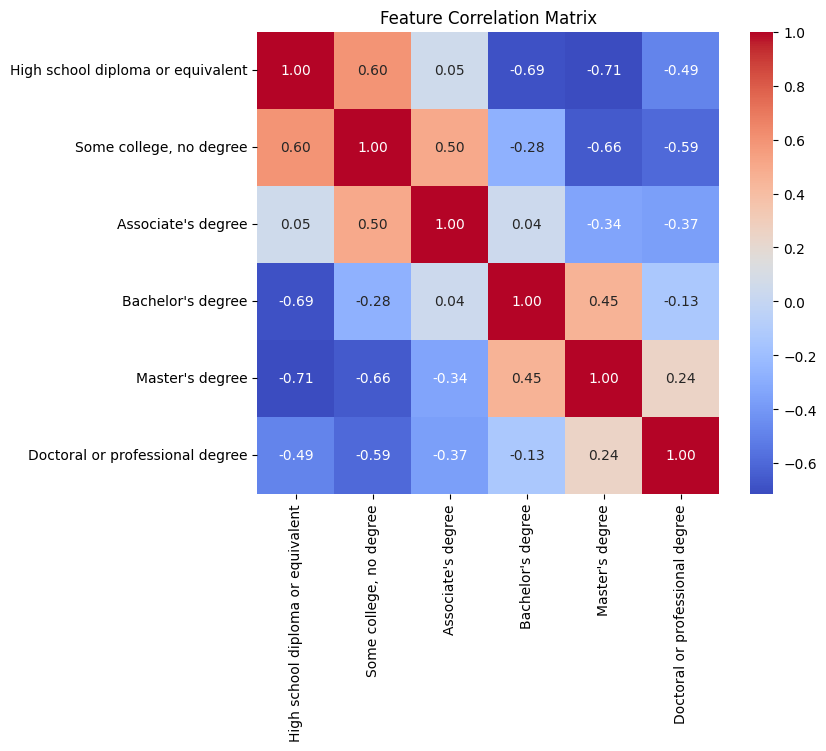

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = [
    "High school diploma or equivalent", 
    "Some college, no degree", 
    "Associate's degree",
    "Bachelor's degree", 
    "Master's degree", 
    "Doctoral or professional degree"
]

correlation_matrix = education_53_1929[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Feature Correlation Matrix')
plt.show()

Correlation Metrics:

0: no correlation at all

0-0.3: weak correlation

0.3-0.7: moderate correlation

0.7-1: strong correlation

Positive Correlation indicates that when one variable increase, the other also does. Negative is the opposite.

In [65]:
education_53_2333 = education_53_2333.dropna()

In [66]:
education_53_2333.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   2023 National Employment Matrix title  832 non-null    object 
 1   2023 National Employment Matrix code   832 non-null    object 
 2   Less than high school diploma          832 non-null    float64
 3   High school diploma or equivalent      832 non-null    float64
 4   Some college, no degree                832 non-null    float64
 5   Associate's degree                     832 non-null    float64
 6   Bachelor's degree                      832 non-null    float64
 7   Master's degree                        832 non-null    float64
 8   Doctoral or professional degree        832 non-null    float64
 9   lables                                 832 non-null    object 
 10  Title Labels                           832 non-null    object 
dtypes: float64(

In [67]:
education_53_2333.describe()

,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,7.661659,23.075721,17.993269,9.184736,22.127284,11.320072,8.640505
std,9.787945,17.259141,10.060820,7.191180,16.333554,13.993335,20.893677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,6.175000,10.700000,4.700000,7.600000,1.400000,0.300000
50%,3.200000,22.350000,19.100000,8.200000,17.600000,4.450000,1.100000
75%,11.400000,39.800000,25.825000,11.725000,34.925000,18.100000,3.700000
max,54.700000,58.000000,53.600000,50.500000,74.300000,81.700000,100.000000


In [68]:
education_53_2333.isnull().sum()

2023 National Employment Matrix title    0
2023 National Employment Matrix code     0
Less than high school diploma            0
High school diploma or equivalent        0
Some college, no degree                  0
Associate's degree                       0
Bachelor's degree                        0
Master's degree                          0
Doctoral or professional degree          0
lables                                   0
Title Labels                             0
dtype: int64

In [69]:
education_53_2333.duplicated().sum()

0

In [70]:
education_53_2333.drop(['2023 National Employment Matrix code', 'lables'], axis=1, inplace=True)

C:\Users\lisaf\AppData\Local\Temp\ipykernel_33860\1742991131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_53_2333.drop(['2023 National Employment Matrix code', 'lables'], axis=1, inplace=True)


In [71]:
education_53_2333

,2023 National Employment Matrix title,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,Title Labels
0,"Total, all occupations",7.4,22.6,18.9,9.5,25.1,11.7,4.8,Management occupations
1,Chief executives,1.6,7.9,13.7,5.2,40.0,24.7,6.9,Management occupations
2,General and operations managers,3.2,17.5,23.5,9.9,32.7,11.5,1.6,Management occupations
3,Legislators,1.6,7.9,13.7,5.2,40.0,24.7,6.9,Management occupations
4,Advertising and promotions managers,1.0,4.2,7.8,5.2,65.2,15.2,1.4,Management occupations
...,...,...,...,...,...,...,...,...,...
827,Gas compressor and gas pumping station operators,14.0,45.1,25.5,6.8,7.8,0.7,0.2,Transportation and material moving occupations
828,"Pump operators, except wellhead pumpers",14.0,45.1,25.5,6.8,7.8,0.7,0.2,Transportation and material moving occupations
829,Wellhead pumpers,14.0,45.1,25.5,6.8,7.8,0.7,0.2,Transportation and material moving occupations
830,Refuse and recyclable material collectors,25.2,48.8,16.1,3.7,5.2,0.7,0.4,Transportation and material moving occupations


In [72]:
numerical_cols = ['Less than high school diploma', 'High school diploma or equivalent', 
                  'Some college, no degree', 'Associate\'s degree', 'Bachelor\'s degree', 
                  'Master\'s degree', 'Doctoral or professional degree']

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

education_53_2333[numerical_cols] = scaler.fit_transform(education_53_2333[numerical_cols])

education_53_2333.head()

C:\Users\lisaf\AppData\Local\Temp\ipykernel_33860\966677631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_53_2333[numerical_cols] = scaler.fit_transform(education_53_2333[numerical_cols])


,2023 National Employment Matrix title,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,Title Labels
0,"Total, all occupations",0.135283,0.389655,0.352612,0.188119,0.337820,0.143207,0.048,Management occupations
1,Chief executives,0.029250,0.136207,0.255597,0.102970,0.538358,0.302326,0.069,Management occupations
2,General and operations managers,0.058501,0.301724,0.438433,0.196040,0.440108,0.140759,0.016,Management occupations
3,Legislators,0.029250,0.136207,0.255597,0.102970,0.538358,0.302326,0.069,Management occupations
4,Advertising and promotions managers,0.018282,0.072414,0.145522,0.102970,0.877524,0.186047,0.014,Management occupations


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = education_53_2333[numerical_cols]
y = education_53_2333['Title Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)\
    


print(classification_report(y_test, y_pred))

                                                            precision    recall  f1-score   support

                  Architecture and engineering occupations       0.00      0.00      0.00         7
Arts, design, entertainment, sports, and media occupations       0.11      0.29      0.15         7
 Building and grounds cleaning and maintenance occupations       0.00      0.00      0.00         3
             Business and financial operations occupations       0.00      0.00      0.00         7
                     Computer and mathematical occupations       0.00      0.00      0.00         7
                   Construction and extraction occupations       0.12      0.09      0.11        11
           Educational instruction and library occupations       0.69      0.73      0.71        15
                Farming, fishing, and forestry occupations       0.00      0.00      0.00         3
          Food preparation and serving related occupations       0.00      0.00      0.00         5

c:\Users\lisaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lisaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lisaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

performance is bad
possible reasons

- imbalanced dataset
- feature selection?


high precision indicates that when the model predicts a class, it's likely correct
high recall means the model is good at identifying instances of the class